In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

import tensorflow as tf
import keras
from keras.layers import Dense, Flatten
from keras.layers import MaxPooling2D, Dropout, Conv2D, Activation
import numpy as np
import numpy.random as random
import pylab as plt
import time
from datetime import datetime
import os
from infotools import *

Using TensorFlow backend.


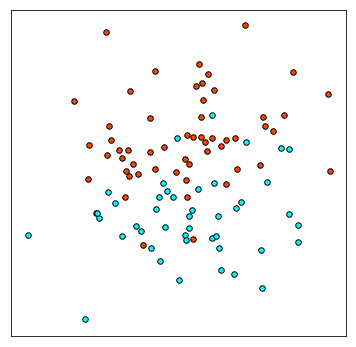

In [2]:
np.random.seed(16) # 1 is good, 16  is good
tf.set_random_seed(5)

def make_data(n, w, p = 0.1):
    X = make_X(n)
    Y_clean = (X.dot(w) > 0)
    Y = np.logical_xor(Y_clean, (random.rand(n) < p))
    return X, Y

def make_X(n):
    return random.randn(n, 2)

def linear_class(X, w):
    Y = (X.dot(w) > 0)
    return Y

N = 100
N_test = 2000
p = 0.1

w = random.randn(2)
X, Y = make_data(N, w, p=p)
X_test, Y_test = make_data(N_test, w, p=p)


def plot_model(model, X, Y, vmin=-2, vmax=+2):
    XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
    pts = np.c_[XX.ravel(), YY.ravel()]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    if model is not None:
        F = model.predict(pts).reshape(XX.shape)
        plt.pcolormesh(XX, YY, F.reshape(XX.shape), vmin=vmin, vmax=vmax, cmap='RdBu')
        plt.contour(XX, YY, F, levels=[0.5], colors='c', linewidths=2.0)
    color01 = ['orangered', 'aqua']
    for label in [0, 1]:
        I = np.where(Y == label)
        plt.scatter(X[I,0], X[I,1], c=color01[label], edgecolors='black', marker=None, s=30.0)
    ax.set_yticks([])
    ax.set_xticks([])

    return None

plot_model(None, X, Y)


Instructions for updating:
Colocations handled automatically by placer.


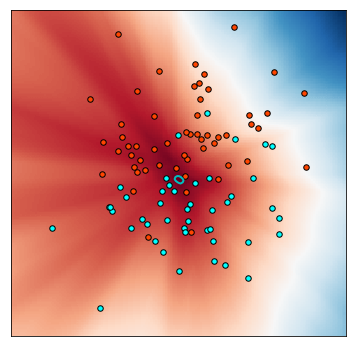

In [3]:
def get_random_FNN(W, hidden_layers, input_dim=2):
    model = keras.Sequential()
    #model.add(Flatten())
    w = input_dim
    for i in range(hidden_layers):
        model.add(Dense(W, activation='relu',input_shape=[w],
                        kernel_initializer=keras.initializers.random_normal(stddev = 1.0/np.sqrt(w)),
                        bias_initializer=keras.initializers.random_normal(stddev = 1.0/np.sqrt(W))))
        w = W

    model.add(Dense(1, activation='sigmoid',input_shape=[w],
                  kernel_initializer=keras.initializers.random_normal(stddev = 1.0/np.sqrt(w)),
                  bias_initializer='zeros'))

    return model

model = get_random_FNN(W=100, hidden_layers=3) 
model.predict(X[:5])
plot_model(model, X, Y, vmin=None, vmax=None)

In [154]:
#model = get_random_FNN(W=100, hidden_layers=3)

In [66]:
#model = get_random_FNN(W=100, hidden_layers=3)
sgd = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, batch_size=128, epochs=500, verbose=False)
#10, 1000

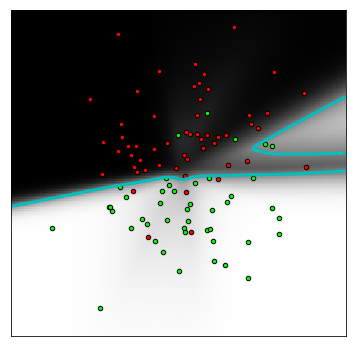

In [71]:
plot_model(model, X, Y, vmin=None, vmax=None)

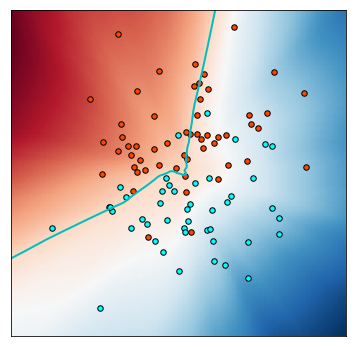

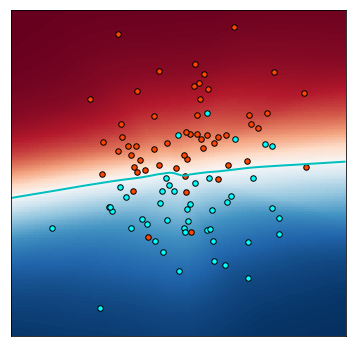

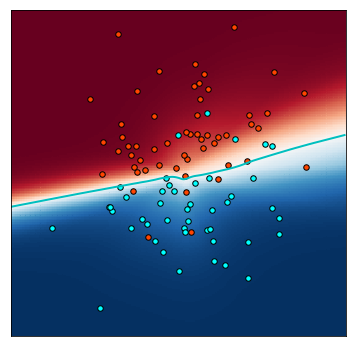

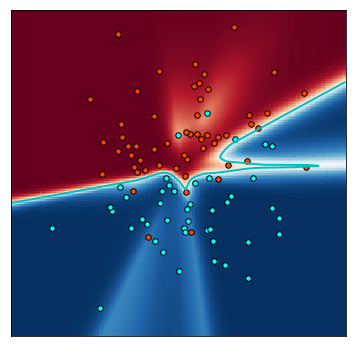

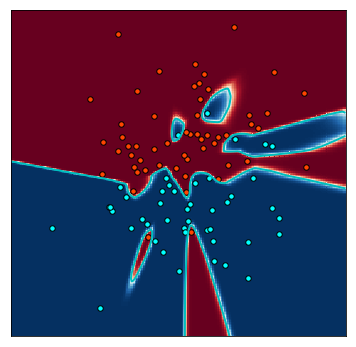

In [74]:
##
## Generate figures and save.
##

model = get_random_FNN(W=100, hidden_layers=3)
sgd = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy'])

path="figs_2d_color/"
steps = 0
for nsteps in [0, 10, 100, 1000, 10000]:
    todo = nsteps-steps
    model.fit(X, Y, batch_size=128, epochs=todo, verbose=False)
    steps = nsteps
    
    plot_model(model, X, Y, vmin=None, vmax=None)
    fname = path + ('step%d' % nsteps)
    plt.savefig(fname)


In [11]:
##
##  Generating Information plots (UNUSED!)
##

def lin_func(X):
    L = (X.dot(w) > 0)
    return L

model = get_random_FNN(W=100, hidden_layers=3)
sgd = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy'])

bsize = 128

model_acc = []
METRICS = {}
cname = 'linear'
METRICS['linear'] = {'I_MYC':[], 'I_MC':[], 'I_MY':[]}
    
for ep in range(10):
    print("Starting epoch at time: ", str(datetime.now().time()))
    
    pMYC = est_density_MYL(model.predict, lin_func, X_test, Y_test)  # p[M, Y, C]
    METRICS[cname]['I_MYC'].append(I_XYZ(pMYC))
    METRICS[cname]['I_MC'].append(I_ab(pMYC, idx=(0, 2)))
    METRICS[cname]['I_MY'].append(I_ab(pMYC, idx=(0, 1)))
        

    model_loss, m_acc = model.evaluate(X_test, Y_test)
    model_acc.append(m_acc)

    model.fit(X, Y, batch_size=bsize, epochs=1, verbose=True)

    print("DONE WITH EPOCH: ", ep)
    print("\n")

Starting epoch at time:  18:45:30.393735
10000/10000 [==============================] - 0s 47us/step
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 0.7472 - acc: 0.2500
DONE WITH EPOCH:  0


Starting epoch at time:  18:45:31.682501
10000/10000 [==============================] - 0s 38us/step
Epoch 1/1
100/100 [==============================] - 0s 36us/step - loss: 0.6658 - acc: 0.6500
DONE WITH EPOCH:  1


Starting epoch at time:  18:45:32.326530
10000/10000 [==============================] - 0s 42us/step
Epoch 1/1
100/100 [==============================] - 0s 39us/step - loss: 0.6200 - acc: 0.7400
DONE WITH EPOCH:  2


Starting epoch at time:  18:45:33.025491
10000/10000 [==============================] - 0s 42us/step
Epoch 1/1
100/100 [==============================] - 0s 39us/step - loss: 0.5861 - acc: 0.8000
DONE WITH EPOCH:  3


Starting epoch at time:  18:45:33.722234
10000/10000 [==============================] - 0s 42us/step
Epoch 1/1
100/100 [=========

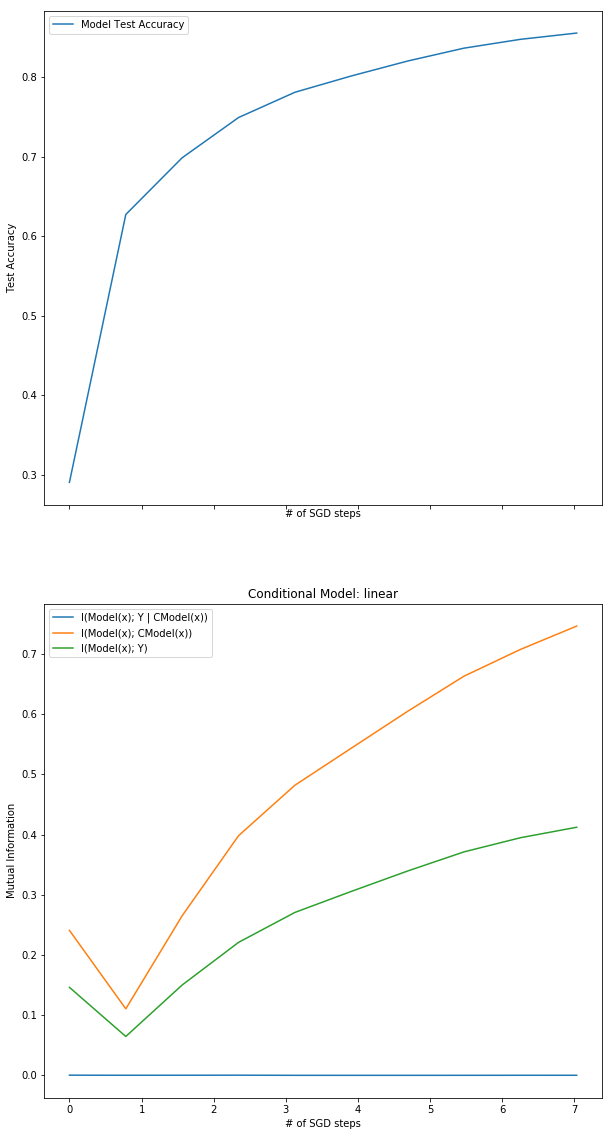

In [12]:
n_steps_per_epoch = len(X) / float(bsize)
steps = n_steps_per_epoch * np.arange(len(model_acc))

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,20))

axes[0].plot(steps, model_acc, label='Model Test Accuracy')
axes[0].set_xlabel("# of SGD steps")
axes[0].set_ylabel("Test Accuracy")
axes[0].legend()

cname = 'linear'
axes[1].plot(steps, METRICS[cname]['I_MYC'], label='I(Model(x); Y | CModel(x))')
axes[1].plot(steps, METRICS[cname]['I_MC'], label='I(Model(x); CModel(x))')
axes[1].plot(steps, METRICS[cname]['I_MY'], label='I(Model(x); Y)')

axes[1].set_xlabel("# of SGD steps")
axes[1].set_ylabel("Mutual Information")
axes[1].set_title('Conditional Model: ' + cname)
axes[1].legend()
    

In [5]:
##
## Experiments Showing Bad Initialization
##

model = get_random_FNN(W=100, hidden_layers=3)
sgd = keras.optimizers.SGD(lr=0.1) 
model.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, batch_size=128, epochs=100, verbose=False)

m_loss, m_acc = model.evaluate(X, Y)
print("losses on TRAIN:")
print(m_loss, m_acc) #0.6217640614509583 0.68
#plot_model(model, X, Y, vmin=None, vmax=None)
#plt.savefig("figs_2d/goodinit.png")

100/100 [==============================] - 0s 598us/step
losses on TRAIN:
(0.3112096631526947, 0.88)


In [6]:
INTENDED_TRAIN_ACC = 0.88 # goal accuracy on the train set

S = random.choice(np.arange(len(X)), size=int((1.0 - INTENDED_TRAIN_ACC) * len(X)) ,replace=False)
Y_tr = np.copy(Y)
Y_tr[S] = 1.0 - Y_tr[S]  # flip the labels on set S to reach intended train acc

n_bad = 500
X_bad = make_X(n_bad)
Y_bad = (random.rand(n_bad) < 0.5)
X_train_bad = np.concatenate((X, X_bad))
Y_train_bad = np.concatenate((Y_tr, Y_bad))

# Train a model on the bad set
bad_model = get_random_FNN(W=100, hidden_layers=3)
sgd = keras.optimizers.SGD(lr=0.1)
bad_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
bad_model.fit(X_train_bad, Y_train_bad, batch_size=128, epochs=10000, verbose=False)

2000/2000 [==============================] - 0s 70us/step
('bad model test acc: ', 0.5685)
100/100 [==============================] - 0s 62us/step
('desired train accuracy: ', 0.88)
('achieved train accuracy', 0.87)


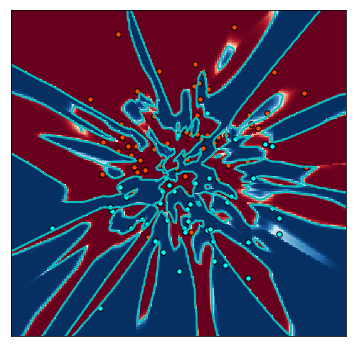

In [7]:
m_loss, m_acc = bad_model.evaluate(X_test, Y_test)
print("bad model test acc: ", m_acc)

m_loss, m_acc = bad_model.evaluate(X, Y)
print("desired train accuracy: ", INTENDED_TRAIN_ACC)
print("achieved train accuracy", m_acc) #should be close to 0.450 0.867

plot_model(bad_model, X, Y, vmin=None, vmax=None)
plt.savefig("figs_2d_color/bad_model2.png")

100/100 [==============================] - 0s 77us/step
desired train accuracy:  0.88
achieved train accuracy 0.88


In [67]:
##
## Continue training from this point
##
# m_history = model.fit(X, Y, batch_size=128, epochs=5000, verbose=False, validation_data=(X_test, Y_test))
#print("Done with model1")

bad_train = keras.models.clone_model(bad_model)
bad_train.set_weights(bad_model.get_weights())

sgd = keras.optimizers.SGD(lr=0.001)
bad_train.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy'])
b_history = bad_train.fit(X, Y, batch_size=128, epochs=1000, verbose=False, validation_data=(X_test, Y_test))

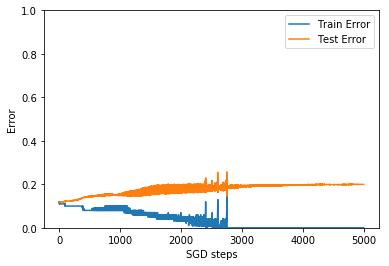

In [35]:
plt.plot(1-np.array(m_history.history['acc']))
plt.plot(1-np.array(m_history.history['val_acc']))
plt.ylabel('Error')
plt.xlabel('SGD steps')
plt.ylim((0,1))
plt.legend(['Train Error', 'Test Error'], loc='upper right')
plt.savefig("figs_2d/training_goodinit.png")

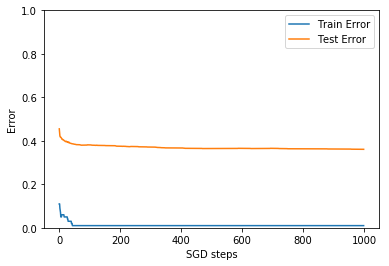

In [68]:
plt.plot(1-np.array(b_history.history['acc']))
plt.plot(1-np.array(b_history.history['val_acc']))
plt.ylabel('Error')
plt.xlabel('SGD steps')
plt.ylim((0,1))
plt.legend(['Train Error', 'Test Error'], loc='upper right')
plt.savefig("figs_2d/training_badinit.png")

In [ ]:
np.save('fig2d_data', (b_history.history['acc'],)

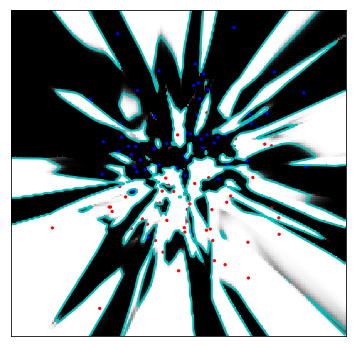

In [70]:
#bad_train = keras.models.clone_model(bad_model)
#bad_train.set_weights(bad_model.get_weights())
plot_model(bad_train, X, Y, vmin=None, vmax=None)
plt.savefig("figs_2d/training_badinit_finalstage.png")